<div style="display: flex; gap: 10px;">
  <img src="../packages/cadfiles/HOOPS_AI.jpg" style="width: 20%;">
</div>

In [8]:
# Visualization libraries
import matplotlib.pyplot as plt

def print_distribution_info(dist, title="Distribution"):
    """Helper function to print and visualize distribution data."""
    list_filecount = list()
    for i, bin_files in enumerate(dist['file_id_codes_in_bins']):
        list_filecount.append(bin_files.size)

    dist['file_count'] =list_filecount
    # Visualization with matplotlib
    fig, ax = plt.subplots(figsize=(6, 4))
    
    bin_centers = 0.5 * (dist['bin_edges'][1:] + dist['bin_edges'][:-1])
    ax.bar(bin_centers, dist['file_count'], width=(dist['bin_edges'][1] - dist['bin_edges'][0]), 
           alpha=0.7, color='steelblue', edgecolor='black', linewidth=1)
    
    # Add file count annotations
    for i, count in enumerate(dist['file_count']):
        if count > 0:  # Only annotate non-empty bins
            ax.text(bin_centers[i], count + 0.5, f"{count}", 
                    ha='center', va='bottom', fontsize=8)
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.set_title(f'{title} Histogram')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Use the Dataset Explorer to navigate the dataset


The `dataset` module provides a comprehensive framework for exploring, navigating, and loading CAD model datasets for machine learning applications. It consists of two primary components that work together to simplify data handling:

1. **DatasetExplorer** - For exploring and querying dataset contents
2. **DatasetLoader** - For loading and preparing datasets for machine learning training

These components are designed to work with the processed data from the `cadaccess` and `cadencoder` modules, as well as the outputs from the flow pipeline system. They provide high-level abstractions that allow users to focus on machine learning tasks rather than data handling complexities.

## DatasetExplorer

The `DatasetExplorer` class (`dataset_explorer.py`) provides methods for exploring and querying datasets stored in Zarr format (.dataset) with accompanying metadata (.infoset) in Parquet files. This class focuses on data discovery, filtering, and statistical analysis.

### Key Methods

#### Data Discovery and Metadata

- `available_groups() -> set`: Returns the set of available dataset groups (faces, edges, file, etc.)
- `get_descriptions(table_name: str, key_id: Optional[int] = None, use_wildchar: Optional[bool] = False) -> pd.DataFrame`: Retrieves metadata descriptions (labels, face types, edge types, etc.)
- `get_parquet_info_by_code(file_id_code: int)`: Returns rows from the Parquet file for a specific file ID code
- `get_file_info_all() -> pd.DataFrame`: Returns all file info from the Parquet metadata

#### Data Distribution Analysis

- `create_distribution(key: str, bins: int = 10, group: str = "faces") -> Dict[str, Any]`: Computes histograms of data distributions using Dask for parallel processing

#### Data Filtering and Selection

- `get_file_list(group: str, where: Callable[[xr.Dataset], xr.DataArray]) -> List[str]`: Returns file IDs matching a boolean filter condition
- `file_dataset(file_id_code: int, group: str) -> xr.Dataset`: Returns a subset of the dataset for a specific file
- `build_membership_matrix(group: str, key: str, bins_or_categories: Union[int, List, np.ndarray], as_counts: bool = False) -> tuple[np.ndarray, np.ndarray, np.ndarray]`: Builds a file-by-bin membership matrix for stratified splitting
- `decode_file_id_code(code: int) -> str`: Converts an integer file ID code to the original string identifier

In [1]:
import hoops_ai
import os

hoops_ai.set_license(hoops_ai.use_test_license())

✓ HOOPS AI License: Valid


In [2]:
from hoops_ai.dataset import DatasetExplorer
import pathlib 
# Define paths
flow_name = "ETL_Fabwave_training"

flow_root_dir = pathlib.Path.cwd().parent.joinpath("packages", "flows", flow_name)
print(flow_root_dir)

parquet_file_path        = str(flow_root_dir.joinpath(f"{flow_name}.infoset"))
merged_store_path     = str(flow_root_dir.joinpath(f"{flow_name}.dataset"))
parquet_file_attribs  = str(flow_root_dir.joinpath(f"{flow_name}.attribset"))


explorer = DatasetExplorer(merged_store_path=merged_store_path, parquet_file_path=parquet_file_path, parquet_file_attribs=parquet_file_attribs)
#explorer.print_table_of_contents()

C:\Users\LuisSalazar\Documents\MAIN\MLProject\repo\hoops_cadflow_tutorials\packages\flows\ETL_Fabwave_training
[DatasetExplorer] Default local cluster started: <Client: 'tcp://127.0.0.1:50033' processes=1 threads=16, memory=7.45 GiB>


Processing file info:   0%|          | 0/4549 [00:00<?, ?it/s]

In [3]:
explorer.get_file_info_all()

,name,id,description,stream_cache_png,stream_cache_3d,subset,table_name
0,0004d4969bb2506a892408d196cbdb78,0,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
1,0005ea5fee9204c69e0c3b63603095aa,1,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
2,0008b1c1c7c99f9ece8b7e31cefeab5e,2,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
3,0016a64aa34530f574f550d5f0c5f0a4,3,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4,003f9989c8426d6fa5f08cc4497e57df,4,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,validation,file_info
...,...,...,...,...,...,...,...
4544,ffcf389124c14782fdb7acaf255c0dbf,4544,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4545,ffde2c440b8bb6b22f02ed1afcbf1d3f,4545,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4546,ffe5687f1812063431053485d5f4681f,4546,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info
4547,ffee7cda5e680c22fd91d34a1a3bea47,4547,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,C:\Users\LuisSalazar\Documents\MAIN\MLProject\...,train,file_info


In [4]:
groups = explorer.available_groups()
print(groups)

{'Labels', 'faces', 'graph', 'edges'}


In [5]:
face_type_description = explorer.get_descriptions("face_types")
print(type(face_type_description), face_type_description)

<class 'pandas.core.frame.DataFrame'>       id      name description  table_name
13691  1  Cylinder     not set  face_types
13692  2      Cone     not set  face_types
13693  0     Plane     not set  face_types
13694  4     Torus     not set  face_types
13695  5     Nurbs     not set  face_types
13696  3    Sphere     not set  face_types


Face labels distribution created in 3.13 seconds



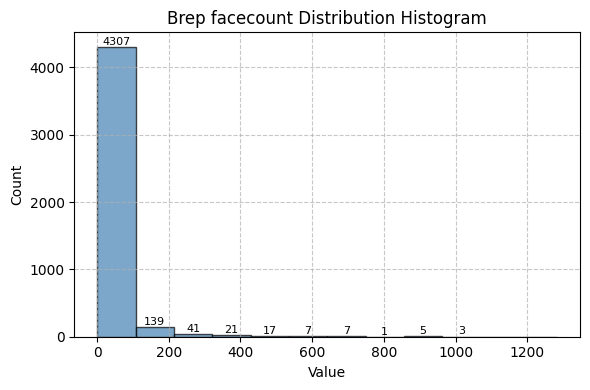

In [9]:
import time
start_time = time.time()
dist = explorer.create_distribution(key="num_nodes", bins=12, group="graph")
print(f"Face labels distribution created in {(time.time() - start_time):.2f} seconds\n")
print_distribution_info(dist, title="Brep facecount Distribution")

In [10]:
largest_files = dist['file_id_codes_in_bins'][9]

## Dataset Visualization with DatasetViewer

The **DatasetViewer** is a powerful visualization tool that bridges dataset queries and visual analysis. It enables you to quickly visualize query results in two ways:

1. **Image Grids**: Generate collages of PNG previews for rapid visual scanning
2. **Interactive 3D Views**: Open inline 3D viewers for detailed model inspection

In [11]:
# Import the DatasetViewer from the insights module
from hoops_ai.insights import DatasetViewer

dataset_viewer = DatasetViewer.from_explorer(explorer)

In [12]:
# condition
brepcount_is_large = lambda ds: ds['num_nodes'] > 200
filelist = explorer.get_file_list(group="graph", where=brepcount_is_large)
print(len(filelist))

107


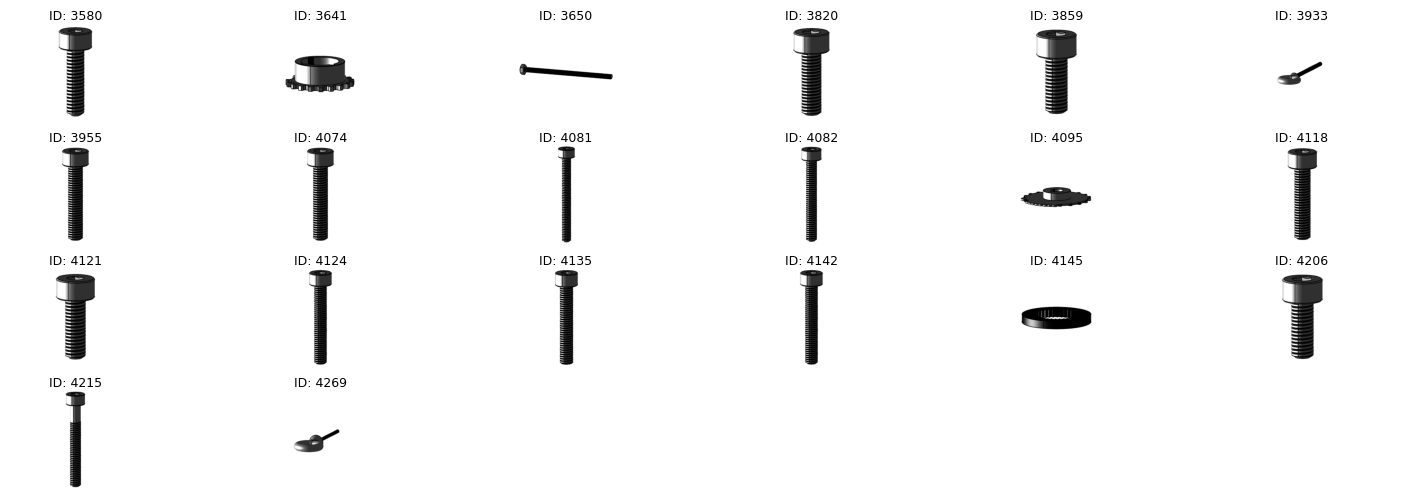

In [13]:
fig = dataset_viewer.show_preview_as_image(filelist[80:100])
plt.show()

Face labels distribution created in 170.29 seconds



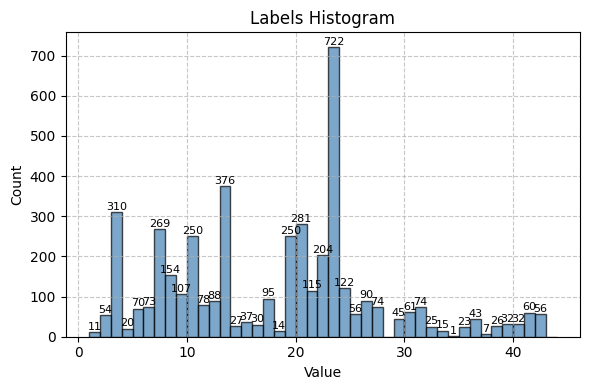

In [14]:
import time
start_time = time.time()
face_dist = explorer.create_distribution(key="part_label", bins=None, group="Labels")
print(f"Face labels distribution created in {(time.time() - start_time):.2f} seconds\n")
print_distribution_info(face_dist, title="Labels")


In [15]:
# condition
label_is_pipefittings = lambda ds: ds['part_label'] == 15
filelist = explorer.get_file_list(group="Labels", where=label_is_pipefittings)
print(len(filelist))

37


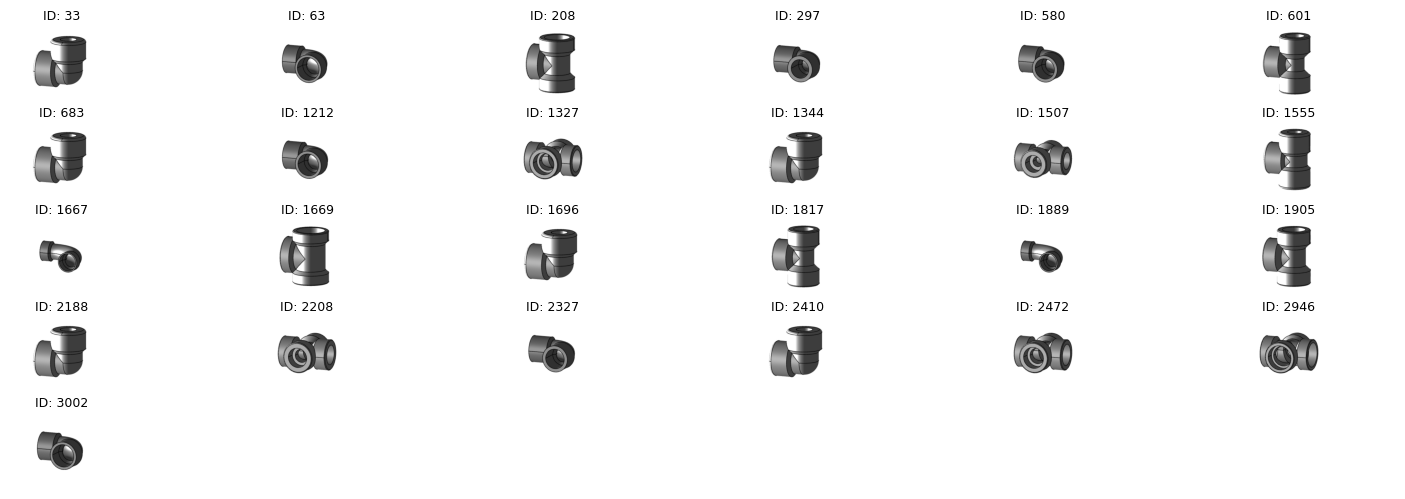

In [16]:
fig = dataset_viewer.show_preview_as_image(filelist[0:36])
plt.show()

In [5]:
# Get and print meta data information
file_id = 25
df_info = explorer.get_parquet_info_by_code(file_id)
print(type(df_info), df_info)

<class 'pandas.core.frame.DataFrame'>                                name  \
0  0167c27f71450ec56a0460a66422c90f   

                                         description subset  id table_name  
0  C:\Users\LuisSalazar\Documents\MAIN\MLProject\...  train  25  file_info  


In [6]:
# Access various dataset groups
file_datasetGroup = {grp: explorer.file_dataset(file_id_code=file_id, group=grp) for grp in groups}

print(f"Datasets (Table of Content) for file ID '{file_id}':")
for grp, ds in file_datasetGroup.items():
    for name, da in ds.data_vars.items():
        print(f"  [{grp}] DATA: {name}, Shape: {da.shape}, Dims: {da.dims}, Size: {da.size}")
print()

file_dataset = file_datasetGroup["faces"]
print("type of file_data_arrays", type(file_dataset))

#print the areas of each face
array_areas = file_dataset["face_areas"].data.compute()
print("type of array_areas", type(array_areas))
print("brep surfaces", array_areas.shape)

Datasets (Table of Content) for file ID '25':
  [edges] DATA: edge_indices, Shape: (120,), Dims: ('edge',), Size: 120
  [edges] DATA: edge_u_grids, Shape: (120, 10, 6), Dims: ('edge', 'dim_x', 'component'), Size: 7200
  [edges] DATA: file_id_code_edges, Shape: (120,), Dims: ('edge',), Size: 120
  [graph] DATA: destination, Shape: (120,), Dims: ('edge',), Size: 120
  [graph] DATA: file_id_code_graph, Shape: (120,), Dims: ('edge',), Size: 120
  [graph] DATA: num_nodes, Shape: (120,), Dims: ('edge',), Size: 120
  [graph] DATA: source, Shape: (120,), Dims: ('edge',), Size: 120
  [file] DATA: duration_dglconvert, Shape: (1,), Dims: ('file',), Size: 1
  [file] DATA: file_id_code_file, Shape: (1,), Dims: ('file',), Size: 1
  [file] DATA: file_label, Shape: (1,), Dims: ('file',), Size: 1
  [file] DATA: size_cadfile, Shape: (1,), Dims: ('file',), Size: 1
  [file] DATA: size_dglfile, Shape: (1,), Dims: ('file',), Size: 1
  [faces] DATA: face_areas, Shape: (42,), Dims: ('face',), Size: 42
  [face

In [7]:
# this requires to be a bit familiar with pandas and dask.
uv_grid_data = file_dataset["face_uv_grids"].data.compute()
print("numpy array shape", uv_grid_data.shape)

numpy array shape (42, 10, 10, 7)


In [19]:
print(uv_grid_data[0,0,0,:])

[-0.71875     4.765625    0.00916667  1.          0.          0.
  1.        ]


In [8]:
print(explorer.get_descriptions("part_label_description"))

[DatasetExplorer] No records found for part_label_description.
Empty DataFrame
Columns: []
Index: []


Face labels distribution created in 0.34 seconds



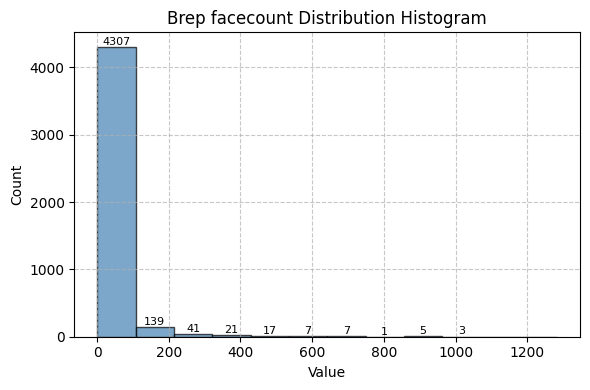

In [13]:
start_time = time.time()
dist = explorer.create_distribution(key="num_nodes", bins=12, group="graph")
print(f"Face labels distribution created in {(time.time() - start_time):.2f} seconds\n")
print_distribution_info(dist, title="Brep facecount Distribution")

# Gather files that fulfilled a given condition. Filter

In [14]:
start_time = time.time()

# condition
label_is_pipefittings = lambda ds: ds['file_label'] == 15

filelist = explorer.get_file_list(group="file", where=label_is_pipefittings)
print(f"Filtering completed in {(time.time() - start_time):.2f} seconds")
print(f"Found {len(filelist)} files with file_labels == 15 (Pipe Fittings)\n")
print(filelist)

Filtering completed in 0.09 seconds
Found 37 files with file_labels == 15 (Pipe Fittings)

[   7  100  124  373  420  460  542  807 1379 1383 1460 1771 1829 1866
 1948 2066 2302 2356 2596 2694 2699 2810 2814 3288 3405 3498 3523 3639
 3697 3777 3967 4015 4116 4177 4179 4235 4366]


# Query data for single file

In [15]:
def demo_query_single_file(explorer, file_id):
    """Show how to access and query dataset details for a single file."""
    print("=== Single File Dataset Access ===")
    import time
    # Get and print parquet info
    df_info = explorer.get_parquet_info_by_code(file_id)
    print("Files info:")
    for column in df_info.columns:
        print(f"Column: {column}")
        for value in df_info[column]:
            print(f"  {value}")
    print()

    # Access various dataset groups
    groups = ["faces", "file", "edges", "graph"]
    datasets = {grp: explorer.file_dataset(file_id_code=file_id, group=grp) for grp in groups}

    print(f"Datasets for file ID '{file_id}':")
    for grp, ds in datasets.items():
        for name, da in ds.data_vars.items():
            print(f"  [{grp}] VARIABLE: {name}, Shape: {da.shape}, Dims: {da.dims}, Size: {da.size}")
    print()

    # Query uv grids data for a specific face
    start_time = time.time()
    uv_grid_data = datasets["faces"]["face_uv_grids"].isel(face=2)
    print("uv_grids data for face index 2:")
    np_uvgrid = uv_grid_data.data.compute()
    print(f"Query took {(time.time() - start_time):.2f} seconds\n")

In [16]:
demo_query_single_file(explorer,file_id=4500)

=== Single File Dataset Access ===
Files info:
Column: name
  fd5cd2ffe87fc717171fc07c66f0a475
Column: description
  C:\Users\LuisSalazar\Documents\MAIN\MLProject\HOOPS_ML_notebooks\examples\sample_files\datasets\fabwave\CAD16-24\Rotary_Shaft\STEP\7ed1b564-b866-42cd-a772-b32d47896c65.stp
Column: subset
  train
Column: id
  4500
Column: table_name
  file_info

Datasets for file ID '4500':
  [faces] VARIABLE: face_areas, Shape: (6,), Dims: ('face',), Size: 6
  [faces] VARIABLE: face_indices, Shape: (6,), Dims: ('face',), Size: 6
  [faces] VARIABLE: face_loops, Shape: (6,), Dims: ('face',), Size: 6
  [faces] VARIABLE: face_types, Shape: (6,), Dims: ('face',), Size: 6
  [faces] VARIABLE: face_uv_grids, Shape: (6, 10, 10, 7), Dims: ('face', 'uv_x', 'uv_y', 'component'), Size: 4200
  [faces] VARIABLE: file_id_code_faces, Shape: (6,), Dims: ('face',), Size: 6
  [file] VARIABLE: duration_dglconvert, Shape: (1,), Dims: ('file',), Size: 1
  [file] VARIABLE: file_id_code_file, Shape: (1,), Dims: 